<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


C:\Users\ebelge\AppData\Local\Temp\ipykernel_26904\1603096019.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='status', palette='coolwarm')


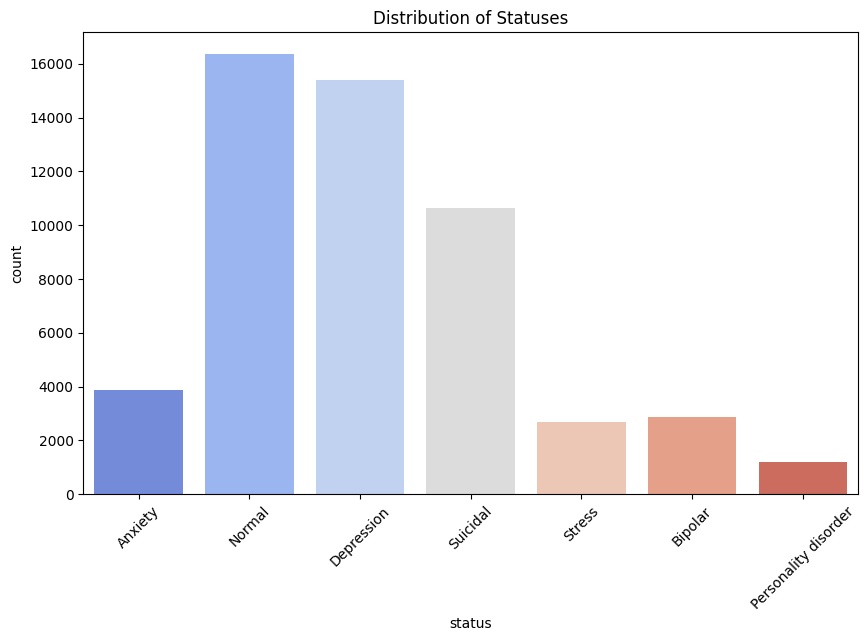

Remaining dataset size: (52681, 3)
                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                   cleaned_statement  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart ...  
2  All wrong back off dear forward doubt Stay in ...  
3  I ve shifted my focus to something else but m ...  
4  I restless and restless it been month now boy ...  


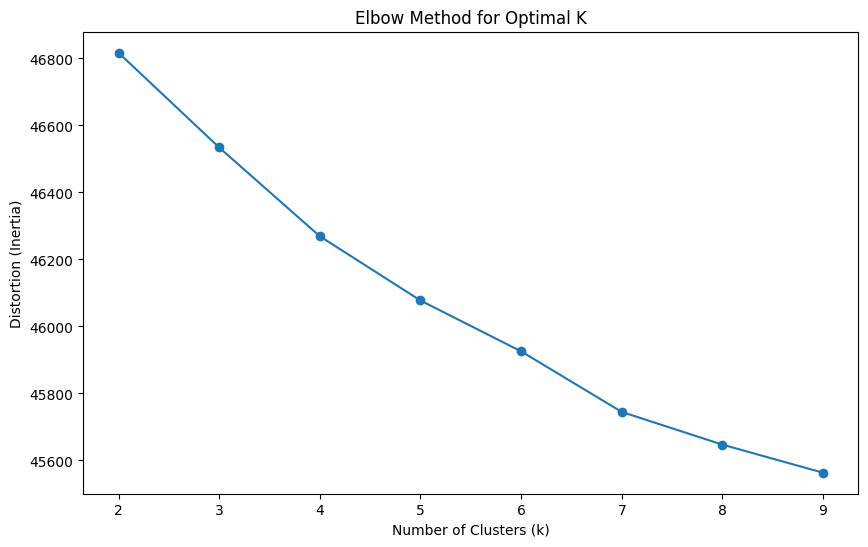

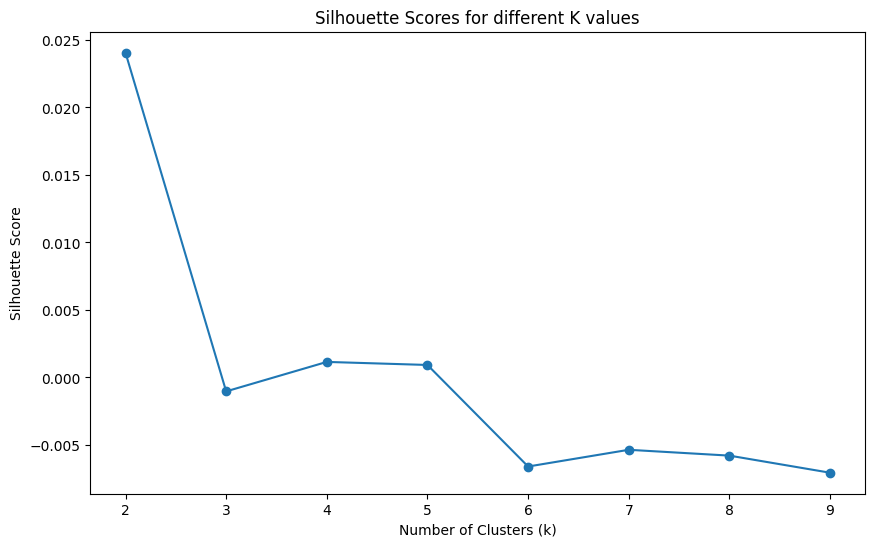

KeyboardInterrupt: 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('Combined Data.csv')
data.head()

# Check and clean missing values
data = data.dropna(subset=['statement'])
print(f"Remaining dataset size: {data.shape}")

# Simple text cleaning function
def clean_text(text):
    # Remove special characters from the text
    text = re.sub(r'\W', ' ', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the text cleaning function to the 'statement' column
data['cleaned_statement'] = data['statement'].apply(clean_text)

# TF-IDF vectorization - Convert the text into numerical values
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_statement']).toarray()

# ----- K-means and Agglomerative Clustering with k=2 -----

# K-means Clustering with k=2
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Agglomerative Clustering with k=2
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clusters = agg_clustering.fit_predict(X)

# Evaluate K-means and Agglomerative Clustering with Silhouette Score
kmeans_silhouette = silhouette_score(X, kmeans_clusters)
agg_silhouette = silhouette_score(X, agg_clusters)

print(f"K-Means Silhouette Score (k=2): {kmeans_silhouette:.4f}")
print(f"Agglomerative Clustering Silhouette Score (k=2): {agg_silhouette:.4f}")

# Visualizing K-means Clustering using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', marker='o')
plt.title('K-means Clustering with k=2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Visualizing Agglomerative Clustering using PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clusters, cmap='plasma', marker='o')
plt.title('Agglomerative Clustering with k=2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
